# Mobil Uygulama Yorum Analizi Problem
## İçindekiler
1. [adım adım model reposu oluşturma](#adım-adım-model-reposu-oluşturma)
2. [kütüphaneler ve kurulum](#kütüphaneler-ve-kurulum)
3. [kullanılan veri kümesi amacı](#kullanılan-veri-kümesi-amacı)
## adım adım model reposu oluşturma
---
- Gerekli Kütüphaneleri Yükle
-  İncelemeleri Ön İşlemden Geçirin: Temiz metin, Tokenleştirme ve lemmatizasyon, Durdurma kelimelerini kaldırma, Olumsuz incelemeleri filtreleme
- Word2Vec Modelini Eğitin: Temizlenmiş yorumları Word2Vec modelini eğitmek veya yüklemek için kullanın:
## kullanılan veri kümesi amacı
---
- Google Play incelemelerinden Temu uygulamasının veri kümesi, yaygın kullanıcı şikayetlerini belirlemek ve kategorize etmek için kullanılır. Olumsuz incelemeleri filtreleyerek, anlamsal kümeleme için Word2Vec uygulayarak ve sıkça bahsedilen sorunları çıkararak, veri kümesi temel sorun alanlarını ortaya çıkarmaya yardımcı olur, geliştiricilerin kullanıcı memnuniyetsizliğini anlamalarını ve uygulama iyileştirmelerine öncelik vermelerini sağlar.
## kütüphaneler ve kurulum
---
-  pandas
-  numpy
-  plotly.express
-  textblob
-  matplotlib
-  scikit-learn
-  gensim
-  google-play-scraper

#### Veri kaynağı olarak Google google play scraper kütüphanesini kullanma

In [2]:
import nltk
import pandas as pd 
import numpy as np 
import plotly.express as px
#!pip install google-play-scraper          
from google_play_scraper import app ,reviews

In [4]:
#Temu uygulaması yorumları veri kaynağı olarak kullanıyor ve yalnızca kullanıcılar tarafından yazılmış 300 yorumu seçiyor
temu,_ = reviews('com.einnovation.temu',lang='en',country='TR',count=300)
#temu
#Tabloda 300 yorum görüntüleniyor
dataFrame =pd.json_normalize(temu)
dataFrame.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,805fbb0f-b474-43bb-ad96-d3f112cec5f2,Jass kaur Jass kaur,https://play-lh.googleusercontent.com/a/ACg8oc...,excellent,5,0,3.59.0,2025-05-31 11:59:21,None,None,3.59.0
1,f93d3f10-a482-43cb-a47e-d09517a8ef63,Liza Geniblazo,https://play-lh.googleusercontent.com/a/ACg8oc...,Temu are considerate. When u complain of somet...,5,0,3.61.0,2025-05-31 11:58:45,None,None,3.61.0
2,a685ae3f-4d02-4b38-850f-ed5fa4c75b9a,Pauline,https://play-lh.googleusercontent.com/a/ACg8oc...,"whilst it is clearly stated, it is a little fr...",4,0,3.61.10,2025-05-31 11:55:14,None,None,3.61.10
3,edb405ac-20f0-4411-976b-ac7bc34ee733,Mahi Sheikh,https://play-lh.googleusercontent.com/a/ACg8oc...,it's really a good app for shopping don't worr...,5,0,3.61.10,2025-05-31 11:54:55,None,None,3.61.10
4,5d2cbdc9-bdfc-4617-8cab-2bc4a23d8991,جريح حرب,https://play-lh.googleusercontent.com/a/ACg8oc...,Very good,5,0,None,2025-05-31 11:54:32,None,None,None


In [6]:
# yorum içerik sütununu bir listeye dönüştürme
temu_yorumlar =list(dataFrame['content'])
print(temu_yorumlar)

['excellent', 'Temu are considerate. When u complain of something, they make it a point to solve it for you or offer something when they are at fault. Thanks temu...', "whilst it is clearly stated, it is a little frustrating with how long it takes. The endless attempts to get you to buy more and more with offers that aren't always as good as they seem, such as the coins, only to find its a discount on what you spend, which won't be cheap. However, I will still use now and again as the products I have received have all been good and there is a good selection and variety of products.", "it's really a good app for shopping don't worry early payment is safe", 'Very good', 'temu Kuch nhi da tha', 'I love Tenu the experience is seemless and delivery is faster than expected.', 'so good', 'excellent platform. excellent customer support.', 'ifffv prf vacation789bt bl7', 'I like this app', 'i love Temu. ❤❤❤', 'ordered phone protectors and mobile covers. when i received the parcel, protectors wer

## sadece negative yorumlar

In [9]:
#!pip install textblob       #ilk kurulum text blod kütüphanesini
from textblob import TextBlob
temu_list_yorumlar_1=[]

for comment in temu_yorumlar:
    polarity = TextBlob(comment).sentiment.polarity
    if polarity < 0:
        temu_list_yorumlar_1.append(comment)
        #print("Olumsuz yorum:", comment)
        
temu_list_yorumlar_1

['ordered phone protectors and mobile covers. when i received the parcel, protectors were fully damaged so I requested a return and the rider never came to pick the items even though it was mentioned that the rider will come and pick the order but no one came. so I contacted helpline 3 days before the return last date but they said to wait and the rider will come and pick it up but still no one came and they cancelled my return request and now they want me to pay 1500 for the return. disappointed.',
 "Had it installed for some reason but had to uninstall it as their devious and malicious ads that are EVERYWHERE AND CAN'T EVER BE SKIPPED kept forcing the app open and when that happened other apps crashed. I hope Temu goes down and disappear soon, just like other apps like this have before it.",
 "We've been searching for a drone camera on Temu for a long time, but it's not available. That's really disappointing.",
 "Enough of the spinning wheel, it's driving me insane when i open the ap

In [11]:
# CSV'ye yaz
import csv
with open("negatif_yorumlar.csv", "w", newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(["Yorum_id", "Yorum"])  # Başlık/Üstbilgi satırı

    for i, temu_list_yorumlar_2 in enumerate(temu_list_yorumlar_1, start=1):
        writer.writerow([f"yorum {i}", temu_list_yorumlar_2])


In [13]:
# CSV dosyanızı yükleyin
temu_list_yorumlar =[]
df = pd.read_csv("negatif_yorumlar.csv")

# Extract the sentence column
temu_list_yorumlar = df["Yorum"].astype(str).tolist()
temu_list_yorumlar

['ordered phone protectors and mobile covers. when i received the parcel, protectors were fully damaged so I requested a return and the rider never came to pick the items even though it was mentioned that the rider will come and pick the order but no one came. so I contacted helpline 3 days before the return last date but they said to wait and the rider will come and pick it up but still no one came and they cancelled my return request and now they want me to pay 1500 for the return. disappointed.',
 "Had it installed for some reason but had to uninstall it as their devious and malicious ads that are EVERYWHERE AND CAN'T EVER BE SKIPPED kept forcing the app open and when that happened other apps crashed. I hope Temu goes down and disappear soon, just like other apps like this have before it.",
 "We've been searching for a drone camera on Temu for a long time, but it's not available. That's really disappointing.",
 "Enough of the spinning wheel, it's driving me insane when i open the ap

## pre-processing

In [18]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Stopwords listesini almak
stop_words = set(stopwords.words('english'))
stop_words_list = list(stop_words)
#print(stop_words_list)

In [20]:
# Kelimeleri tokenleştirip, Sadece harf olan kelimeleri al ve stopword'leri çıkar
filtered_sentences = []
for sentence in temu_list_yorumlar:
    tokens = word_tokenize(sentence) #yorumlar kelimelere böl
    filtered_tokens = [] #bos lıste olustur
    for token in tokens:
        if token.isalpha(): # tokenler metın mı dıye kontrol edıyor(numerık ıse ısleme hıc almıyor)
            token_lower = token.lower() # kucuk harfe cevırme
            if token_lower not in stop_words: # eger kucuk harfe cevrılmıs bu kelımeler stopword lıstesı ıcınden bır kelıme degılse
                filtered_tokens.append(token_lower) #filtered_tokens lıstesıne yukarıdakı krıterlerı saglayan kelımelerı ekle
    filtered_sentences.append(filtered_tokens) #fıltre edılmıs cumlelerı filtered_sentences lıstesıne ekle
print(filtered_sentences[:200]) #ılk 200 yorumlar yazdır.

[['ordered', 'phone', 'protectors', 'mobile', 'covers', 'received', 'parcel', 'protectors', 'fully', 'damaged', 'requested', 'return', 'rider', 'never', 'came', 'pick', 'items', 'even', 'though', 'mentioned', 'rider', 'come', 'pick', 'order', 'one', 'came', 'contacted', 'helpline', 'days', 'return', 'last', 'date', 'said', 'wait', 'rider', 'come', 'pick', 'still', 'one', 'came', 'cancelled', 'return', 'request', 'want', 'pay', 'return', 'disappointed'], ['installed', 'reason', 'uninstall', 'devious', 'malicious', 'ads', 'everywhere', 'ca', 'ever', 'skipped', 'kept', 'forcing', 'app', 'open', 'happened', 'apps', 'crashed', 'hope', 'temu', 'goes', 'disappear', 'soon', 'like', 'apps', 'like'], ['searching', 'drone', 'camera', 'temu', 'long', 'time', 'available', 'really', 'disappointing'], ['enough', 'spinning', 'wheel', 'driving', 'insane', 'open', 'app', 'least', 'add', 'option', 'disable', 'stick', 'ali', 'express', 'less', 'headaches', 'app', 'dreaded', 'spinning', 'wheel'], ['quality

#### Tüm yorumları lemmatize edip CSV dosyası olarak kaydedeceğim

In [23]:
lemmatizer = WordNetLemmatizer() # Lemmatizeri başlat
tokenized_corpus_lemmatized = [] #lemma edılmıs cumlelerı saklamak ıcın bos bır lıste olustur
for i, filtered_tokens in enumerate( filtered_sentences, start=1):
    lemmatized_tokens = [] #lemma edılmıs tokenlerı(kelıme) saklamak ıcın bos bır lıste olustur
    for token in filtered_tokens:
        lemma = lemmatizer.lemmatize(token) #Tokenlerı tek tek lemma etme␣ıslemı
        lemmatized_tokens.append(lemma) #Lemma edılmıs tokenlerı lemmatized_tokens lıstesıne ekle
    tokenized_corpus_lemmatized.append(lemmatized_tokens) #Lemma edılmıs yorumlar tokenized_corpus_lemmatized lıstesıne ekle
#print(tokenized_corpus_lemmatized[:300])

In [25]:
import csv
with open("lemmatized_temu_yorumlar.csv", mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["Lemmatized yorum"]) # başlık
    # Her yorum bir satır olarak yaz
    for i, tokens in enumerate(tokenized_corpus_lemmatized, start=1):
        writer.writerow([' '.join(tokens)])

#### Tüm yorumları Stemle edip CSV dosyası olarak kaydedeceğim

In [28]:
stemmer = PorterStemmer() # stemmeri başlat
tokenized_corpus_stemmed = [] #Stem edılmıs yorum saklamak ıcın bos bır lıste olustur
for filtered_tokens in filtered_sentences:
    stemmed_tokens = [] #Stem edılmıs tokenlerı(kelıme) saklamak ıcın bos bır lıste olustur
    for token in filtered_tokens:
        stem = stemmer.stem(token) #Tokenlerı tek tek Stem etme ıslemı
        stemmed_tokens.append(stem) #Stem edılmıs tokenlerı stemmed_tokens lıstesıne ekle
    tokenized_corpus_stemmed.append(stemmed_tokens) #Stem edılmıs yorum tokenized_corpus_stemmed lıstesıne ekle
print(tokenized_corpus_stemmed[:200])

[['order', 'phone', 'protector', 'mobil', 'cover', 'receiv', 'parcel', 'protector', 'fulli', 'damag', 'request', 'return', 'rider', 'never', 'came', 'pick', 'item', 'even', 'though', 'mention', 'rider', 'come', 'pick', 'order', 'one', 'came', 'contact', 'helplin', 'day', 'return', 'last', 'date', 'said', 'wait', 'rider', 'come', 'pick', 'still', 'one', 'came', 'cancel', 'return', 'request', 'want', 'pay', 'return', 'disappoint'], ['instal', 'reason', 'uninstal', 'deviou', 'malici', 'ad', 'everywher', 'ca', 'ever', 'skip', 'kept', 'forc', 'app', 'open', 'happen', 'app', 'crash', 'hope', 'temu', 'goe', 'disappear', 'soon', 'like', 'app', 'like'], ['search', 'drone', 'camera', 'temu', 'long', 'time', 'avail', 'realli', 'disappoint'], ['enough', 'spin', 'wheel', 'drive', 'insan', 'open', 'app', 'least', 'add', 'option', 'disabl', 'stick', 'ali', 'express', 'less', 'headach', 'app', 'dread', 'spin', 'wheel'], ['qualiti', 'good'], ['gener', 'like', 'shop', 'temu', 'seem', 'miss', 'sever', 'p

In [30]:
with open("stemmed_temu_yorumlar.csv", mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["stemmed yorum"]) # başlık
    # Her yorum bir satır olarak yaz
    for tokens in tokenized_corpus_stemmed:
        writer.writerow([' '.join(tokens)])

### Zipf yasasi

In [33]:
import matplotlib.pyplot as plt
from nltk.corpus import gutenberg

# Tokenize kelimelere (converting Tokenize list into a list text of words)
word_list = []
for comment in temu_list_yorumlar:
    words = comment.split()  # or use nltk.word_tokenize for better tokenization
    word_list.extend(words)

# print(word_list[:1000])

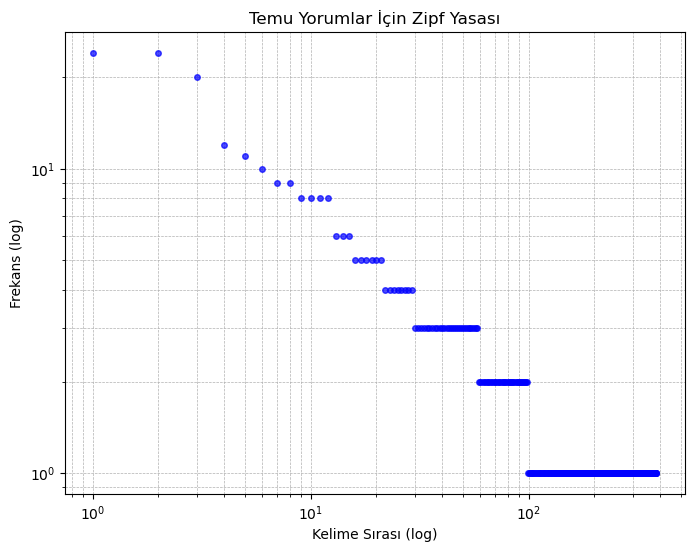

In [35]:
# Kelime frekanslarını hesapla
word_freq = {} # kutuphane kullanmadan
for word in word_list:
    word_freq[word] = word_freq.get(word, 0) + 1
# Frekansları azalan şekilde sırala
sorted_freqs = sorted(word_freq.values(), reverse=True)
# Rank (sıralama) oluştur
ranks = np.arange(1, len(sorted_freqs) + 1)
# Log-log grafiği çiz
plt.figure(figsize=(8, 6))
plt.loglog(ranks, sorted_freqs, marker="o", linestyle="none", markersize=4, alpha=0.7, color="b")
# Grafik etiketleri
plt.xlabel("Kelime Sırası (log)")
plt.ylabel("Frekans (log)")
plt.title("Temu Yorumlar İçin Zipf Yasası")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

In [37]:
print("Toplam kelime (tokens):", len(word_list)) #Toplam kelime
print("Benzersiz kelime (vocab size):", len(set(word_list))) #Benzersiz kelime

Toplam kelime (tokens): 685
Benzersiz kelime (vocab size): 385


### A. TF-IDF Vektörleştirme
##### Lematize edilmiş veri kümesinin TF-IDF vektörleştirme işlemi.

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
#!pip install scikit-learn

# Ön işlenmiş token listelerini tekrar metne çeviriyoruz
lemmatized_texts = [' '.join(tokens) for tokens in tokenized_corpus_lemmatized]
lemmatized_texts[:100]

['ordered phone protector mobile cover received parcel protector fully damaged requested return rider never came pick item even though mentioned rider come pick order one came contacted helpline day return last date said wait rider come pick still one came cancelled return request want pay return disappointed',
 'installed reason uninstall devious malicious ad everywhere ca ever skipped kept forcing app open happened apps crashed hope temu go disappear soon like apps like',
 'searching drone camera temu long time available really disappointing',
 'enough spinning wheel driving insane open app least add option disable stick ali express less headache app dreaded spinning wheel',
 'quality good',
 'generally like shopping temu seem missing several package past week kinda disappointed',
 'scam advertising many fake reward expensive product buy temu',
 'sorry money pay',
 'missing mishandling product order ordered wrist pressure monitor console bag delivered empty console cover bag instead 

In [42]:
# TF-IDF vektörizerı başlatıyoruz
vectorizer = TfidfVectorizer()
# TF-IDF matrisini oluşturuyoruz
#terim frekansları, belge frekanslarıni hesplar
#TF-IDF vektörlerine dönüştürür
tfidf_matrix = vectorizer.fit_transform(lemmatized_texts)
## Kelimeleri alalım
#F-IDF vektörleştirme işleminde kullanılan tüm kelimelerin essiz bir listesini döndürur
feature_names = vectorizer.get_feature_names_out()
# TF-IDF matrisini pandas DataFrame'e çevir-gorunurluk acisindan- calismasi kolay
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
# İlk birkaç satırı gösterelim-ilk 5 cümle
print(tfidf_df.head())

   aap  able  absolutely  achii        ad       add  advertising  afford  \
0  0.0   0.0         0.0    0.0  0.000000  0.000000          0.0     0.0   
1  0.0   0.0         0.0    0.0  0.162574  0.000000          0.0     0.0   
2  0.0   0.0         0.0    0.0  0.000000  0.000000          0.0     0.0   
3  0.0   0.0         0.0    0.0  0.000000  0.203419          0.0     0.0   
4  0.0   0.0         0.0    0.0  0.000000  0.000000          0.0     0.0   

        ali  allowed  ...  week     wheel  whilst  whose  wicked  wickedness  \
0  0.000000      0.0  ...   0.0  0.000000     0.0    0.0     0.0         0.0   
1  0.000000      0.0  ...   0.0  0.000000     0.0    0.0     0.0         0.0   
2  0.000000      0.0  ...   0.0  0.000000     0.0    0.0     0.0         0.0   
3  0.203419      0.0  ...   0.0  0.406838     0.0    0.0     0.0         0.0   
4  0.000000      0.0  ...   0.0  0.000000     0.0    0.0     0.0         0.0   

    wo  would  wrist  wrong  
0  0.0    0.0    0.0    0.0  
1 

In [44]:
# İkinci cümle için TF-IDF skorlarını al
first_comment_vector = tfidf_df.iloc[2]
# Skorlara göre sırala (yüksekten düşüğe)
top_20_words = first_comment_vector.sort_values(ascending=False).head(20)
# Sonucu yazdır
print("İkinci yorum en yüksek TF-IDF skoruna sahip 20 kelime:")
print(top_20_words)

İkinci yorum en yüksek TF-IDF skoruna sahip 20 kelime:
disappointing    0.350939
long             0.350939
available        0.350939
camera           0.350939
searching        0.350939
drone            0.350939
really           0.350939
time             0.311024
temu             0.202875
phone            0.000000
play             0.000000
place            0.000000
pick             0.000000
aap              0.000000
pester           0.000000
poor             0.000000
people           0.000000
pay              0.000000
poisoning        0.000000
product          0.000000
Name: 2, dtype: float64


In [46]:
from sklearn.metrics.pairwise import cosine_similarity

# bad kelimesinin vektörünü alalım
fake_index = feature_names.tolist().index('bad') # 'bad' kelimesinin indeksini bul
# bad kelimesinin TF-IDF vektörünü alıyoruz ve 2D formatta yapıyoruz
fake_vector = tfidf_matrix[:, fake_index].toarray()
# Tüm kelimelerin TF-IDF vektörlerini alıyoruz
tfidf_vectors = tfidf_matrix.toarray()
# Cosine similarity hesaplayalım
similarities = cosine_similarity(fake_vector.T, tfidf_vectors.T)
# Benzerlikleri sıralayalım ve en yüksek 5 kelimeyi seçelim
similarities = similarities.flatten()
top_5_indices = similarities.argsort()[-6:][::-1] # 6. en büyükten başlıyoruz çünkü kendisi de dahil
# Sonuçları yazdıralım
for index in top_5_indices:
    print(f"{feature_names[index]}: {similarities[index]:.4f}")

bad: 1.0000
aap: 0.7831
service: 0.7831
download: 0.7831
use: 0.7610
dollar: 0.4464


In [48]:
# lemmatize edilmiş, temizlenmiş TF-IDF vektörleştirilmiş tema yorumlarını bir csv dosyasına kaydet

# Sonuçları listele
results = [(feature_names[i], round(similarities[i], 4)) for i in top_5_indices]

with open("tfidf_lemmatized.csv", mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(['kelime', 'metin'])
    writer.writerows(results)

#### stem edilmiş veri kümesinin TF-IDF vektörleştirme işlemi.

In [51]:
# Ön işlenmiş token listelerini tekrar metne çeviriyoruz
stemmed_texts = [' '.join(tokens) for tokens in tokenized_corpus_stemmed]
stemmed_texts[:100]

['order phone protector mobil cover receiv parcel protector fulli damag request return rider never came pick item even though mention rider come pick order one came contact helplin day return last date said wait rider come pick still one came cancel return request want pay return disappoint',
 'instal reason uninstal deviou malici ad everywher ca ever skip kept forc app open happen app crash hope temu goe disappear soon like app like',
 'search drone camera temu long time avail realli disappoint',
 'enough spin wheel drive insan open app least add option disabl stick ali express less headach app dread spin wheel',
 'qualiti good',
 'gener like shop temu seem miss sever packag past week kinda disappoint',
 'scam advertis mani fake reward expens product buy temu',
 'sorri money pay',
 'miss mishandl product order order wrist pressur monitor consol bag deliv empti consol cover bag instead order violat',
 'appear randomli swipe away',
 'irrit ad',
 'timo say bought three thing order one ar

In [53]:
# TF-IDF vektörizerı başlatıyoruz
vectorizer = TfidfVectorizer()
# TF-IDF matrisini oluşturuyoruz
#terim frekansları, belge frekanslarıni hesplar
#TF-IDF vektörlerine dönüştürür
tfidf_matrix = vectorizer.fit_transform(stemmed_texts)
## Kelimeleri alalım
#F-IDF vektörleştirme işleminde kullanılan tüm kelimelerin essiz bir listesini döndürur
feature_names = vectorizer.get_feature_names_out()
# TF-IDF matrisini pandas DataFrame'e çevir-gorunurluk acisindan- calismasi kolay
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
# İlk birkaç satırı gösterelim-ilk 5 cümle
print(tfidf_df.head())

   aap  abl  absolut  achii        ad       add  advertis  afford       ali  \
0  0.0  0.0      0.0    0.0  0.000000  0.000000       0.0     0.0  0.000000   
1  0.0  0.0      0.0    0.0  0.158811  0.000000       0.0     0.0  0.000000   
2  0.0  0.0      0.0    0.0  0.000000  0.000000       0.0     0.0  0.000000   
3  0.0  0.0      0.0    0.0  0.000000  0.205071       0.0     0.0  0.205071   
4  0.0  0.0      0.0    0.0  0.000000  0.000000       0.0     0.0  0.000000   

   allow  ...  week     wheel  whilst  whose  wick  wicked   wo  would  wrist  \
0    0.0  ...   0.0  0.000000     0.0    0.0   0.0     0.0  0.0    0.0    0.0   
1    0.0  ...   0.0  0.000000     0.0    0.0   0.0     0.0  0.0    0.0    0.0   
2    0.0  ...   0.0  0.000000     0.0    0.0   0.0     0.0  0.0    0.0    0.0   
3    0.0  ...   0.0  0.410141     0.0    0.0   0.0     0.0  0.0    0.0    0.0   
4    0.0  ...   0.0  0.000000     0.0    0.0   0.0     0.0  0.0    0.0    0.0   

   wrong  
0    0.0  
1    0.0  
2    

In [55]:
# İkinci yorum için TF-IDF skorlarını al
first_yorum_vector = tfidf_df.iloc[1]
# Skorlara göre sırala (yüksekten düşüğe)
top_9_words = first_yorum_vector.sort_values(ascending=False).head(9)
# Sonucu yazdır
print("İkinci yorum en yüksek TF-IDF skoruna sahip 9 kelime:")
print(top_9_words)

İkinci yorum en yüksek TF-IDF skoruna sahip 9 kelime:
app          0.439413
like         0.292942
instal       0.197142
everywher    0.197142
hope         0.197142
forc         0.197142
uninstal     0.197142
skip         0.197142
happen       0.197142
Name: 1, dtype: float64


In [57]:
# froud kelimesinin vektörünü alalım
fake_index = feature_names.tolist().index('froud') # 'fake' kelimesinin indeksini bul
# froud kelimesinin TF-IDF vektörünü alıyoruz ve 2D formatta yapıyoruz
fake_vector = tfidf_matrix[:, fake_index].toarray()
# Tüm kelimelerin TF-IDF vektörlerini alıyoruz
tfidf_vectors = tfidf_matrix.toarray()
# Cosine similarity hesaplayalım
similarities = cosine_similarity(fake_vector.T, tfidf_vectors.T)
# Benzerlikleri sıralayalım ve en yüksek 5 kelimeyi seçelim
similarities = similarities.flatten()
top_5_indices = similarities.argsort()[-6:][::-1] # 6. en büyükten başlıyoruz çünkü kendisi de dahil
# Sonuçları yazdıralım
for index in top_5_indices:
    print(f"{feature_names[index]}: {similarities[index]:.4f}")

froud: 1.0000
parsal: 1.0000
month: 1.0000
late: 0.9877
one: 0.7244
order: 0.6132


In [59]:
# steme edilmiş, temizlenmiş TF-IDF vektörleştirilmiş tema yorumlarını bir csv dosyasına kaydet

# Sonuçları listele
results = [(feature_names[i], round(similarities[i], 4)) for i in top_5_indices]

with open("tfidf_stemmed.csv", mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(['kelime', 'benzerlik'])
    writer.writerows(results)

### En çok tekrar eden şikayet başlıkları çıkarılır.

In [64]:
from collections import Counter
import itertools
# Tüm belirteçleştirilmiş kelimeleri düzleştir (Flatten all tokenized words)
all_words = list(itertools.chain.from_iterable(tokenized_corpus_lemmatized))

# Count word frequency
word_freq = Counter(all_words)

# Get the most common complaint topics
common_complaints = word_freq.most_common(10)
print("Most common complaint topics:")
for word, freq in common_complaints:
    print(f"{word}: {freq}")

Most common complaint topics:
temu: 8
order: 6
one: 5
like: 5
money: 5
return: 4
ad: 4
app: 4
arrive: 4
ordered: 3


### B. Word2Vec Vektörleştirme

In [67]:
import gensim
from gensim.models import Word2Vec

In [85]:
from gensim.models import KeyedVectors
#tokenized_corpus_lemmatized
#tokenized_corpus_stemmed

# Word2Vec modeli eğitmek için parametreler
parameters = [ {'model_type': 'cbow', 'window': 2, 'vector_size': 100},
 {'model_type': 'skipgram', 'window': 2, 'vector_size': 100},
 {'model_type': 'cbow', 'window': 4, 'vector_size': 100},
 {'model_type': 'skipgram', 'window': 4, 'vector_size': 100},
 {'model_type': 'cbow', 'window': 2, 'vector_size': 300},
 {'model_type': 'skipgram', 'window': 2, 'vector_size': 300},
 {'model_type': 'cbow', 'window': 4, 'vector_size': 300},
 {'model_type': 'skipgram', 'window': 4, 'vector_size': 300}]

# Fonksiyon ile Word2Vec modeli eğitme ve kaydetme
def train_and_save_model(corpus, params, model_name):
    model = Word2Vec(corpus, vector_size=params['vector_size'], window=params['window'], min_count=1, sg=1 if params['model_type'] == 'skipgram' else 0)
    model.save(f"{model_name}_{params['model_type']}_window{params['window']}_dim{params['vector_size']}.model")
    print(f"{model_name}_{params['model_type']}_window{params['window']}_dim{params['vector_size']} model saved!")
# Lemmatize edilmiş corpus ile modelleri eğitme ve kaydetme
for param in parameters:
    train_and_save_model(tokenized_corpus_lemmatized, param, "word2vec_lemmatized")
# Stemlenmiş corpus ile modelleri eğitme ve kaydetme
for param in parameters:
    train_and_save_model(tokenized_corpus_stemmed, param, "stemmed_model")


word2vec_lemmatized_cbow_window2_dim100 model saved!
word2vec_lemmatized_skipgram_window2_dim100 model saved!
word2vec_lemmatized_cbow_window4_dim100 model saved!
word2vec_lemmatized_skipgram_window4_dim100 model saved!
word2vec_lemmatized_cbow_window2_dim300 model saved!
word2vec_lemmatized_skipgram_window2_dim300 model saved!
word2vec_lemmatized_cbow_window4_dim300 model saved!
word2vec_lemmatized_skipgram_window4_dim300 model saved!
stemmed_model_cbow_window2_dim100 model saved!
stemmed_model_skipgram_window2_dim100 model saved!
stemmed_model_cbow_window4_dim100 model saved!
stemmed_model_skipgram_window4_dim100 model saved!
stemmed_model_cbow_window2_dim300 model saved!
stemmed_model_skipgram_window2_dim300 model saved!
stemmed_model_cbow_window4_dim300 model saved!
stemmed_model_skipgram_window4_dim300 model saved!


In [87]:
from gensim.models import Word2Vec

# Model dosyalarını yüklemek
model_1 = Word2Vec.load("lemmatized_model_cbow_window2_dim100.model")
model_2 = Word2Vec.load("stemmed_model_skipgram_window4_dim100.model")
model_3 = Word2Vec.load("lemmatized_model_skipgram_window2_dim300.model")

# 'fake' kelimesi ile en benzer 3 kelimeyi ve skorlarını yazdırmak
def print_similar_words(model, model_name):
    similarity = model.wv.most_similar('fake', topn=3)
    print(f"\n{model_name} Modeli - 'bad' ile En Benzer 3 Kelime:")
    for word, score in similarity:
        print(f"Kelime: {word}, Benzerlik Skoru: {score}")
# 3 model için benzer kelimeleri yazdır
print_similar_words(model_1, "Lemmatized CBOW Window 2 Dim 100")
print_similar_words(model_2, "Stemmed Skipgram Window 4 Dim 100")
print_similar_words(model_3, "Lemmatized Skipgram Window 2 Dim 300")


Lemmatized CBOW Window 2 Dim 100 Modeli - 'bad' ile En Benzer 3 Kelime:
Kelime: popping, Benzerlik Skoru: 0.21889738738536835
Kelime: ad, Benzerlik Skoru: 0.2164149433374405
Kelime: lazada, Benzerlik Skoru: 0.20447270572185516

Stemmed Skipgram Window 4 Dim 100 Modeli - 'bad' ile En Benzer 3 Kelime:
Kelime: mani, Benzerlik Skoru: 0.3253897428512573
Kelime: item, Benzerlik Skoru: 0.3128632605075836
Kelime: everyday, Benzerlik Skoru: 0.21161197125911713

Lemmatized Skipgram Window 2 Dim 300 Modeli - 'bad' ile En Benzer 3 Kelime:
Kelime: ki, Benzerlik Skoru: 0.19785353541374207
Kelime: false, Benzerlik Skoru: 0.18230026960372925
Kelime: faulty, Benzerlik Skoru: 0.11067494750022888


In [93]:
def evaluate_model(model_name, similar_texts):
    print(f"\nDeğerlendirilen Model: {model_name}")
    scores = []

    for i, text in enumerate(similar_texts, start=1):
        print(f"{i}. Benzer Metin: {text}")
        while True:
            try:
                score = int(input(f"{i}. metin için benzerlik skoru (1-5): "))
                if 1 <= score <= 5:
                    scores.append(score)
                    break
                else:
                    print("Lütfen 1 ile 5 arasında bir sayı girin.")
            except ValueError:
                print("Geçerli bir sayı girin.")

    average_score = sum(scores) / len(scores)
    print(f"{model_name} Ortalama Skoru: {average_score:.2f}")
    return model_name, scores, average_score

# Örnek veri (yerine kendi model çıktılarınızı koyun)
model_outputs = {
    "Model A": ["text1", "text2", "text3", "text4", "text5"],
    "Model B": ["text6", "text7", "text8", "text9", "text10"],
    "Model C": ["text11", "text12", "text13", "text14", "text15"],
}

# Değerlendirme sonuçlarını toplamak
results = []
for model_name, texts in model_outputs.items():
    results.append(evaluate_model(model_name, texts))

# Sonuçları yazdır
print("\n--- Özet ---")
for model_name, scores, avg in results:
    print(f"{model_name}: Skorlar = {scores} → Ortalama = {avg:.2f}")


Değerlendirilen Model: Model A
1. Benzer Metin: text1


1. metin için benzerlik skoru (1-5):  4


2. Benzer Metin: text2


2. metin için benzerlik skoru (1-5):  


Geçerli bir sayı girin.


2. metin için benzerlik skoru (1-5):  4


3. Benzer Metin: text3


3. metin için benzerlik skoru (1-5):  2


4. Benzer Metin: text4


4. metin için benzerlik skoru (1-5):  3


5. Benzer Metin: text5


5. metin için benzerlik skoru (1-5):  1


Model A Ortalama Skoru: 2.80

Değerlendirilen Model: Model B
1. Benzer Metin: text6


1. metin için benzerlik skoru (1-5):  3


2. Benzer Metin: text7


2. metin için benzerlik skoru (1-5):  4


3. Benzer Metin: text8


3. metin için benzerlik skoru (1-5):  3


4. Benzer Metin: text9


4. metin için benzerlik skoru (1-5):  3


5. Benzer Metin: text10


5. metin için benzerlik skoru (1-5):  2


Model B Ortalama Skoru: 3.00

Değerlendirilen Model: Model C
1. Benzer Metin: text11


1. metin için benzerlik skoru (1-5):  


Geçerli bir sayı girin.


1. metin için benzerlik skoru (1-5):  3


2. Benzer Metin: text12


2. metin için benzerlik skoru (1-5):  2


3. Benzer Metin: text13


3. metin için benzerlik skoru (1-5):  4


4. Benzer Metin: text14


4. metin için benzerlik skoru (1-5):  2


5. Benzer Metin: text15


5. metin için benzerlik skoru (1-5):  2


Model C Ortalama Skoru: 2.60

--- Özet ---
Model A: Skorlar = [4, 4, 2, 3, 1] → Ortalama = 2.80
Model B: Skorlar = [3, 4, 3, 3, 2] → Ortalama = 3.00
Model C: Skorlar = [3, 2, 4, 2, 2] → Ortalama = 2.60
